# Asymmetric Gaussian Demo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from curvefit.core.functions import *
from curvefit.core.model import CurveModel

## Simulate Data

In [2]:
t = np.linspace(0.0, 100.0, 101)
params = np.array([0.1, 50.0, 1.0, 0.5])

In [3]:
y = ln_asym_gaussian_pdf(t, params)
y_obs = y + np.random.randn(y.size)*0.1

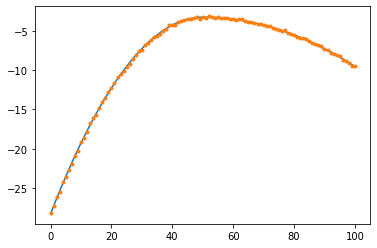

In [6]:
plt.plot(t, y)
plt.plot(t, y_obs, '.')

## Create and fit Curvefit model

In [7]:
df = pd.DataFrame({
    't': t,
    'obs': y_obs,
    'intercept': np.ones(t.size),
    'group': 'A',
})

In [8]:
param_names = ['alpha', 'beta', 'p', 'r']
link_fun = [np.exp, lambda x: x, np.exp, np.exp]
var_link_fun = [lambda x: x]*4
fun = ln_asym_gaussian_pdf

In [9]:
model = CurveModel(
    df,
    col_t='t',
    col_obs='obs',
    col_covs=[['intercept'], ['intercept'], ['intercept'], ['intercept']],
    col_group='group',
    param_names=param_names,
    link_fun=link_fun,
    var_link_fun=var_link_fun,
    fun=fun
)

In [10]:
model.fit_params(fe_init=params,
                 fe_bounds=[[-np.inf, 0.0], [-np.inf, np.inf], [-np.inf, 0.0], [-np.inf, 0.0]],
                 re_bounds=[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
                 options={'disp': True})

In [11]:
print(model.params)

[[ 0.0996798 ]
 [50.11785305]
 [ 1.        ]
 [ 0.50441713]]
